<a href="https://colab.research.google.com/github/ianuhs/Pneumonia-Classifier/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Training a Pneumonia Classifier with PyTorch**





In [ ]:
pip install torch torchvision pillow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [1]:
import multiprocessing

multiprocessing.cpu_count()

2

In [1]:
!unzip -q /content/drive/MyDrive/data.zip -d /content/


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


Epoch 1/25, Train Loss: 0.1207, Train Acc: 0.9563
Validation Loss: 1.0800, Validation Accuracy: 0.6250
Epoch 2/25, Train Loss: 0.0684, Train Acc: 0.9745
Validation Loss: 0.2690, Validation Accuracy: 0.8750
Epoch 3/25, Train Loss: 0.0529, Train Acc: 0.9787
Validation Loss: 1.1432, Validation Accuracy: 0.5625
Epoch 4/25, Train Loss: 0.0332, Train Acc: 0.9872
Validation Loss: 0.2193, Validation Accuracy: 0.8750
Epoch 5/25, Train Loss: 0.0189, Train Acc: 0.9941
Validation Loss: 0.0373, Validation Accuracy: 1.0000
Epoch 6/25, Train Loss: 0.0294, Train Acc: 0.9879
Validation Loss: 0.5364, Validation Accuracy: 0.8125
Epoch 7/25, Train Loss: 0.0177, Train Acc: 0.9950
Validation Loss: 0.0130, Validation Accuracy: 1.0000
Epoch 8/25, Train Loss: 0.0161, Train Acc: 0.9944
Validation Loss: 1.1889, Validation Accuracy: 0.6875
Epoch 9/25, Train Loss: 0.0149, Train Acc: 0.9958
Validation Loss: 1.9545, Validation Accuracy: 0.6875
Epoch 10/25, Train Loss: 0.0295, Train Acc: 0.9902
Validation Loss: 0.753

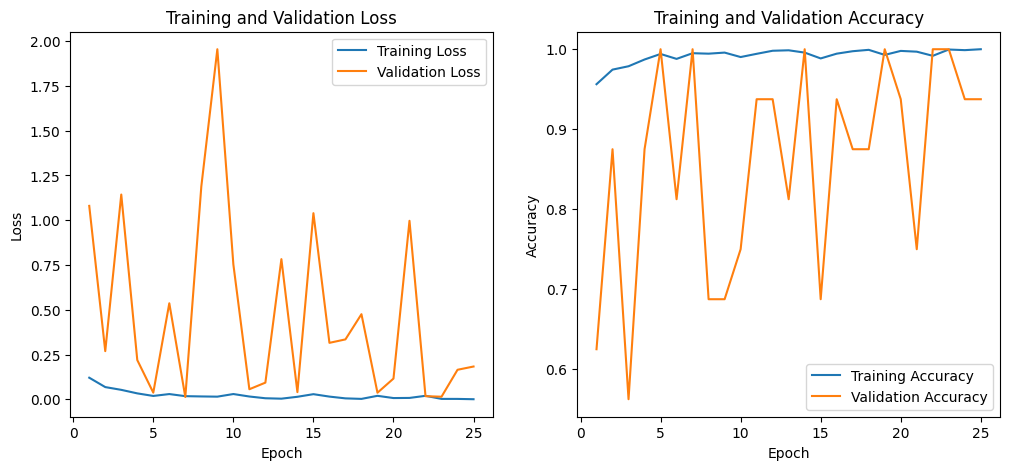

Test Accuracy: 0.7740
Precision: 0.7353
Recall: 0.9974
F1 Score: 0.8466
ROC AUC: 0.9235
Confusion Matrix:
[[ 94 140]
 [  1 389]]


IndexError: index 18 is out of bounds for axis 0 with size 18

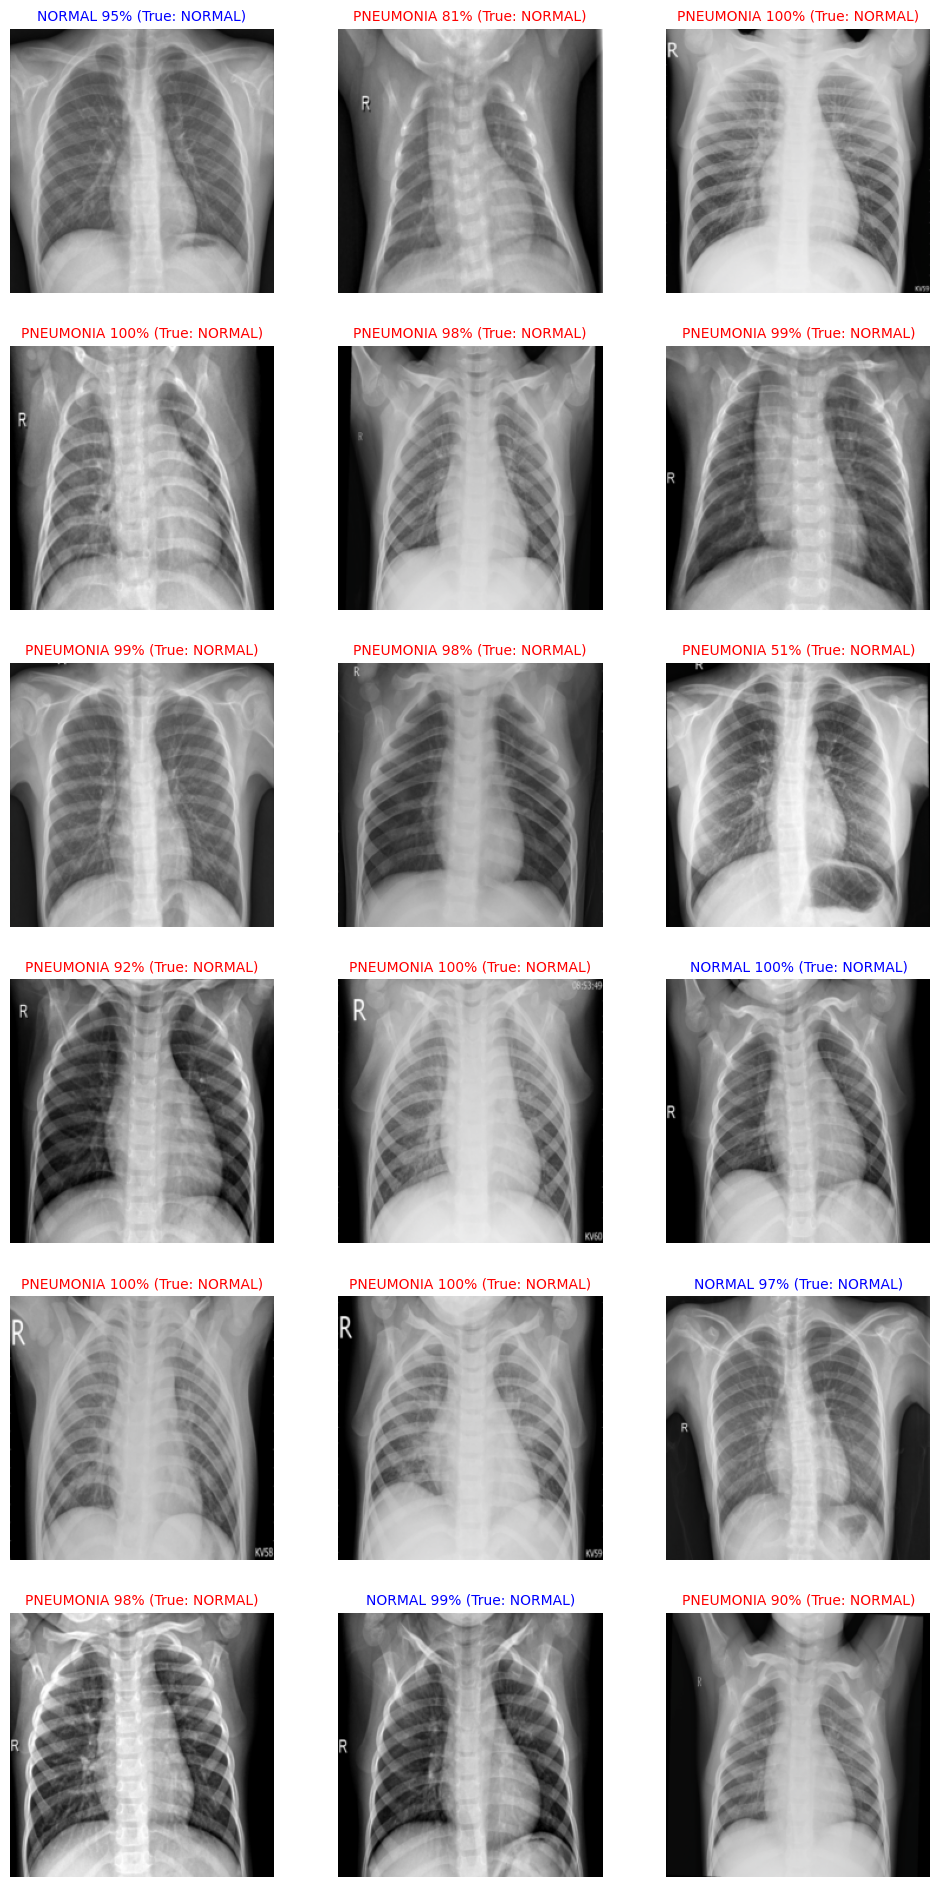

In [2]:
import os

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class PneumoniaDataset(Dataset):

  def __init__(self, root_dir, transform=None):

      self.root_dir = root_dir
      self.transform = transform
      self.image_paths = []
      self.labels = []

      for label in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join (root_dir, label)
        for img_name in os.listdir(class_dir):
            self.image_paths.append(os.path.join(class_dir, img_name))
            self.labels.append(0 if label == 'NORMAL' else 1)

  def __len__(self):
      return len(self.image_paths)

  def __getitem__(self, idx):
      img_path = self.image_paths[idx]
      image = Image.open(img_path).convert('RGB')
      label = self.labels[idx]

      if self.transform:
        image = self.transform(image)

      return image, label


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

train_dataset = PneumoniaDataset(root_dir='/content/data/train', transform=transform)
val_dataset = PneumoniaDataset(root_dir='/content/data/val', transform=transform)
test_dataset = PneumoniaDataset(root_dir='/content/data/test', transform=transform)


num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=num_workers)

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2) #NORMAL, PNEUMONIA
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epoch = 25

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epoch):
  model.train()
  running_loss = 0.0
  running_corrects = 0
  total_train = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * images.size(0)  # multiply by batch size
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels).item()
    total_train += labels.size(0)

  epoch_loss = running_loss / total_train
  epoch_acc = running_corrects / total_train

  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_acc)

  print(f"Epoch {epoch + 1}/{num_epoch}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")

  model.eval()
  val_labels = []
  val_preds = []
  val_loss = 0.0
  total_val = 0

  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      val_loss += loss.item() * images.size(0)
      _, prds = torch.max(outputs, 1)

      val_labels.extend(labels.cpu().numpy())
      val_preds.extend(prds.cpu().numpy())
      total_val += labels.size(0)

  val_epoch_loss = val_loss / total_val
  val_losses.append(val_epoch_loss)

  val_accuracy = accuracy_score(val_labels, val_preds)
  val_accuracies.append(val_accuracy)

  print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# plotting results

import matplotlib.pyplot as plt

epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# test evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

model.eval()
test_labels = []
test_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for PNEUMONIA class

        _, preds = torch.max(outputs, 1)

        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)
roc_auc = roc_auc_score(test_labels, all_probs)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(cm)

# Visualization of model predictions

import matplotlib.pyplot as plt
import torch.nn.functional as F

num_samples_to_show = 15

label_map = {0: 'NORMAL', 1: 'PNEUMONIA'}

# batch of test samples
model.eval()
shown = 0
fig, axs = plt.subplots(nrows=num_samples_to_show // 3, ncols=3, figsize=(12, 4 * (num_samples_to_show // 3)))
axs = axs.flatten()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)

        preds = torch.argmax(probs, dim=1)

        for i in range(images.size(0)):
            if shown >= num_samples_to_show:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # unnormalize
            img = np.clip(img, 0, 1)

            pred_class = preds[i].item()
            pred_conf = probs[i][pred_class].item()
            true_class = labels[i].item()

            title_color = 'blue' if pred_class == true_class else 'red'
            prediction_str = f"{label_map[pred_class]} {int(pred_conf * 100)}% (True: {label_map[true_class]})"

            axs[shown].imshow(img, cmap='gray')
            axs[shown].axis('off')
            axs[shown].set_title(prediction_str, fontsize=10, color=title_color)

            shown += 1

        if shown >= num_samples_to_show:
            break

plt.tight_layout()
plt.show()

Epoch 1/20, Train Loss: 0.1241, Train Acc: 0.9507
Validation Loss: 0.5164, Validation Accuracy: 0.7500
Epoch 2/20, Train Loss: 0.0579, Train Acc: 0.9801
Validation Loss: 0.3773, Validation Accuracy: 0.8125
Epoch 3/20, Train Loss: 0.0549, Train Acc: 0.9785
Validation Loss: 0.0803, Validation Accuracy: 1.0000
Epoch 4/20, Train Loss: 0.0331, Train Acc: 0.9866
Validation Loss: 0.4003, Validation Accuracy: 0.8750
Epoch 5/20, Train Loss: 0.0312, Train Acc: 0.9885
Validation Loss: 0.0059, Validation Accuracy: 1.0000
Epoch 6/20, Train Loss: 0.0321, Train Acc: 0.9873
Validation Loss: 2.2823, Validation Accuracy: 0.6875
Epoch 7/20, Train Loss: 0.0189, Train Acc: 0.9933
Validation Loss: 0.0200, Validation Accuracy: 1.0000
Epoch 8/20, Train Loss: 0.0118, Train Acc: 0.9960
Validation Loss: 1.2822, Validation Accuracy: 0.6875
Epoch 9/20, Train Loss: 0.0119, Train Acc: 0.9965
Validation Loss: 0.5713, Validation Accuracy: 0.8750
Epoch 10/20, Train Loss: 0.0098, Train Acc: 0.9965
Validation Loss: 0.046

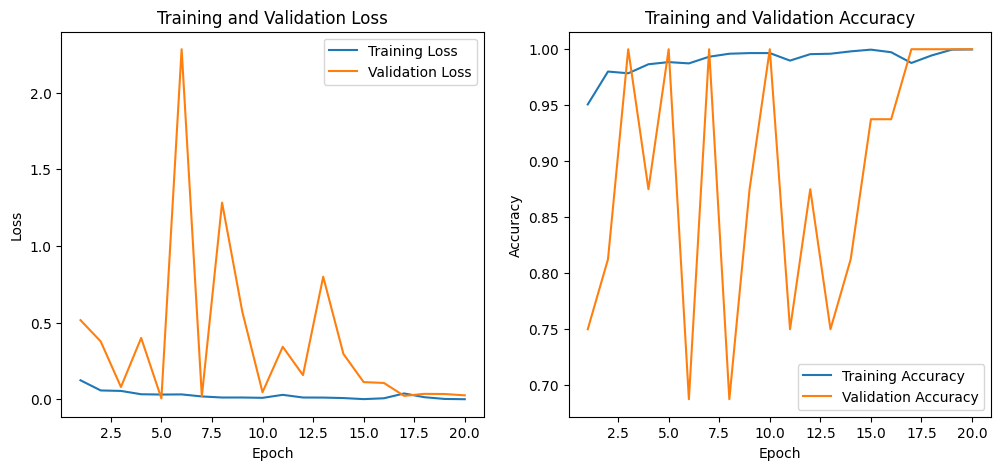

Test Accuracy: 0.7628
Precision: 0.7257
Recall: 0.9974
F1 Score: 0.8402
ROC AUC: 0.9245
Confusion Matrix:
[[ 87 147]
 [  1 389]]


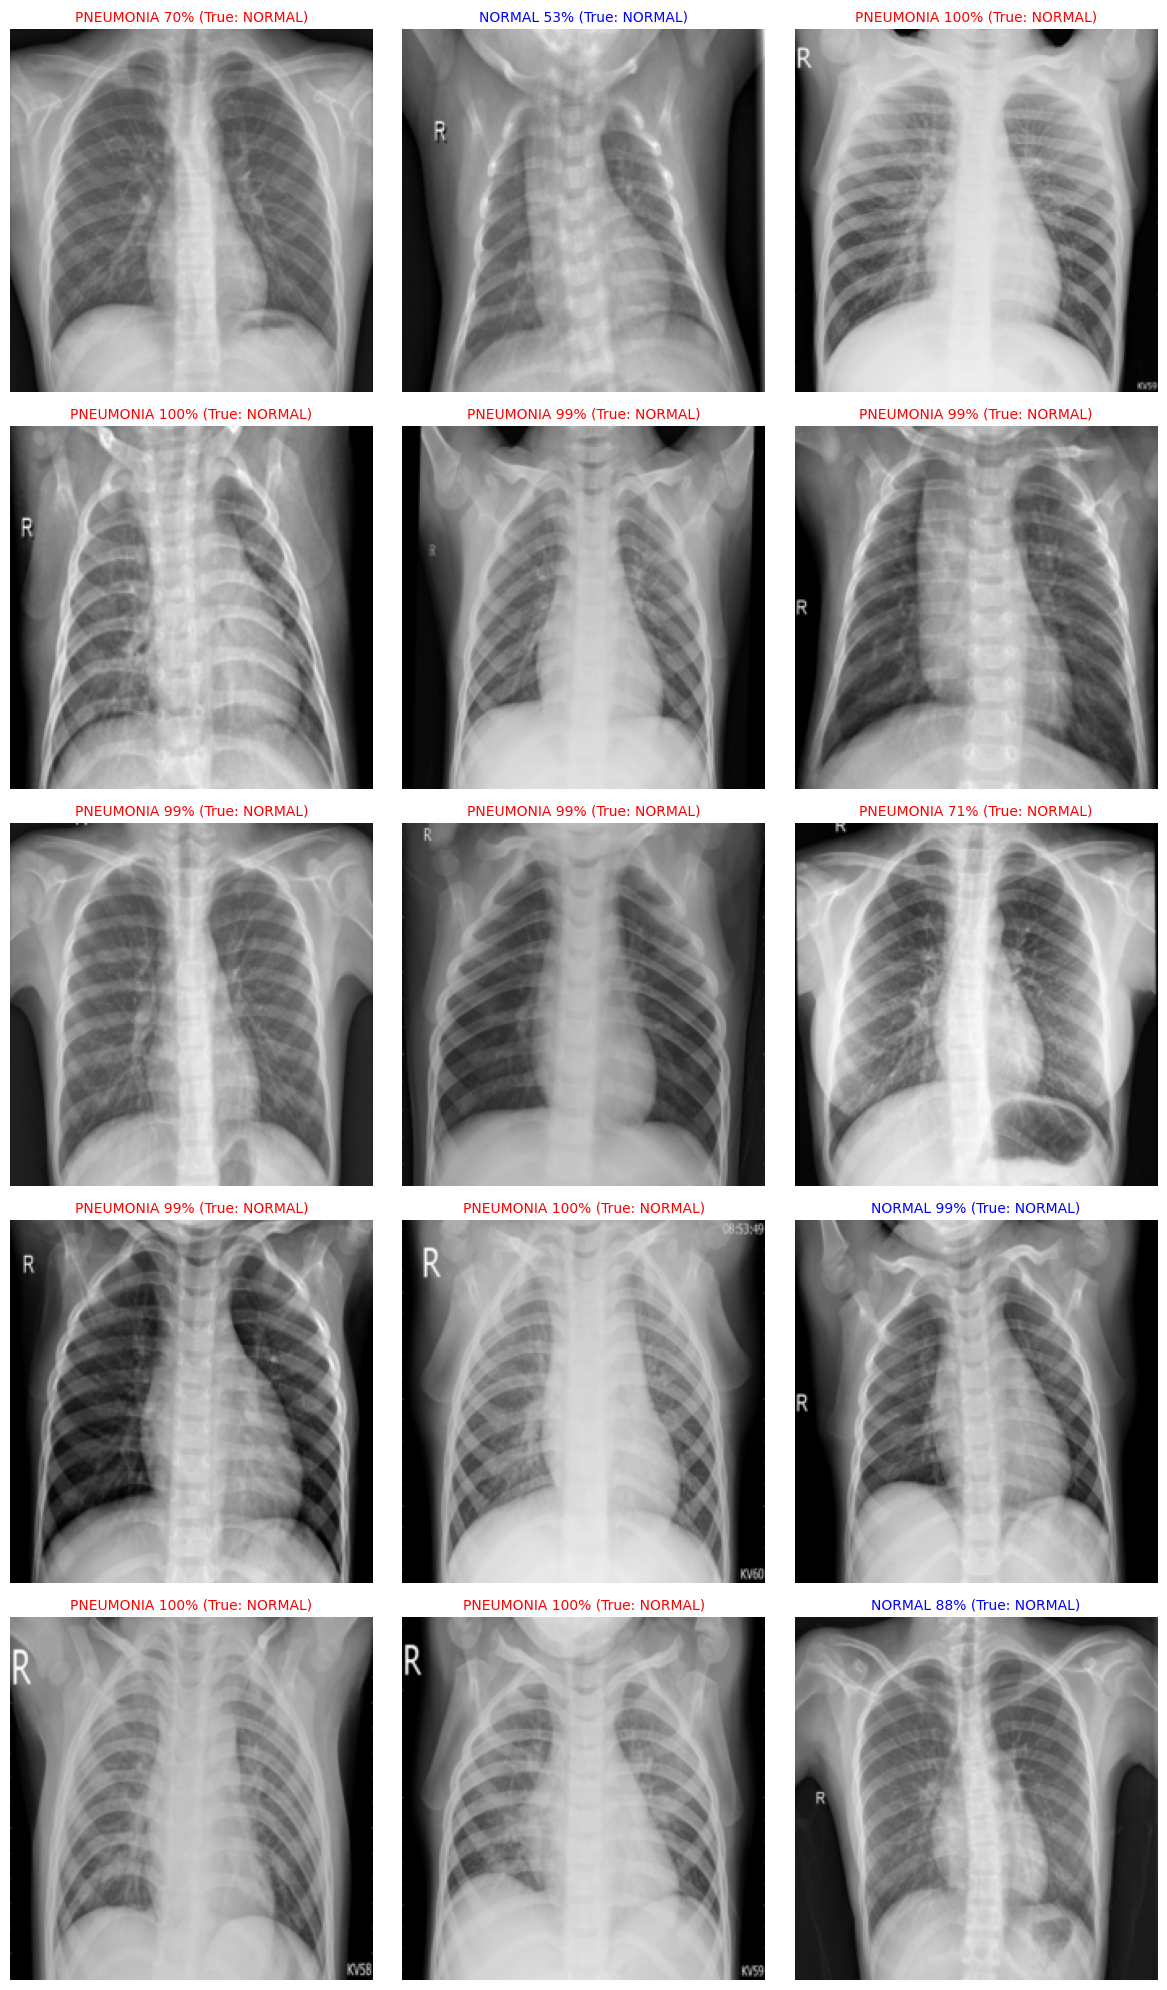

In [3]:
import os

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class PneumoniaDataset(Dataset):

  def __init__(self, root_dir, transform=None):

      self.root_dir = root_dir
      self.transform = transform
      self.image_paths = []
      self.labels = []

      for label in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join (root_dir, label)
        for img_name in os.listdir(class_dir):
            self.image_paths.append(os.path.join(class_dir, img_name))
            self.labels.append(0 if label == 'NORMAL' else 1)

  def __len__(self):
      return len(self.image_paths)

  def __getitem__(self, idx):
      img_path = self.image_paths[idx]
      image = Image.open(img_path).convert('RGB')
      label = self.labels[idx]

      if self.transform:
        image = self.transform(image)

      return image, label


transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

train_dataset = PneumoniaDataset(root_dir='/content/data/train', transform=transform)
val_dataset = PneumoniaDataset(root_dir='/content/data/val', transform=transform)
test_dataset = PneumoniaDataset(root_dir='/content/data/test', transform=transform)


num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=num_workers)

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2) #NORMAL, PNEUMONIA
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epoch = 20

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epoch):
  model.train()
  running_loss = 0.0
  running_corrects = 0
  total_train = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * images.size(0)  # multiply by batch size
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels).item()
    total_train += labels.size(0)

  epoch_loss = running_loss / total_train
  epoch_acc = running_corrects / total_train

  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_acc)

  print(f"Epoch {epoch + 1}/{num_epoch}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")

  model.eval()
  val_labels = []
  val_preds = []
  val_loss = 0.0
  total_val = 0

  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      val_loss += loss.item() * images.size(0)
      _, prds = torch.max(outputs, 1)

      val_labels.extend(labels.cpu().numpy())
      val_preds.extend(prds.cpu().numpy())
      total_val += labels.size(0)

  val_epoch_loss = val_loss / total_val
  val_losses.append(val_epoch_loss)

  val_accuracy = accuracy_score(val_labels, val_preds)
  val_accuracies.append(val_accuracy)

  print(f'Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# plotting results

import matplotlib.pyplot as plt

epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# test evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

model.eval()
test_labels = []
test_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for PNEUMONIA class

        _, preds = torch.max(outputs, 1)

        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)
roc_auc = roc_auc_score(test_labels, all_probs)
cm = confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(cm)

# Visualization of model predictions

import matplotlib.pyplot as plt
import torch.nn.functional as F

num_samples_to_show = 15

label_map = {0: 'NORMAL', 1: 'PNEUMONIA'}

# batch of test samples
model.eval()
shown = 0
fig, axs = plt.subplots(nrows=num_samples_to_show // 3, ncols=3, figsize=(12, 4 * (num_samples_to_show // 3)))
axs = axs.flatten()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probs = F.softmax(outputs, dim=1)

        preds = torch.argmax(probs, dim=1)

        for i in range(images.size(0)):
            if shown >= num_samples_to_show:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # unnormalize
            img = np.clip(img, 0, 1)

            pred_class = preds[i].item()
            pred_conf = probs[i][pred_class].item()
            true_class = labels[i].item()

            title_color = 'blue' if pred_class == true_class else 'red'
            prediction_str = f"{label_map[pred_class]} {int(pred_conf * 100)}% (True: {label_map[true_class]})"

            axs[shown].imshow(img, cmap='gray')
            axs[shown].axis('off')
            axs[shown].set_title(prediction_str, fontsize=10, color=title_color)

            shown += 1

        if shown >= num_samples_to_show:
            break

plt.tight_layout()
plt.show()